# Supervised Learning: Support Vector Machines

## kernel trick: 2D: illustration

In [1]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

### example: decide whether a fruit is good to eat.

There are **four** kinds of fruit.
1. Small yellow fruits are unripe plums, not good to eat.
2. Small purple fruits are ripe plums, good to eat.
3. Large yellow fruits are ripe peaches, good to eat.
4. Large purple fruits are rotten peaches, not good to eat.

<IPython.core.display.Javascript object>


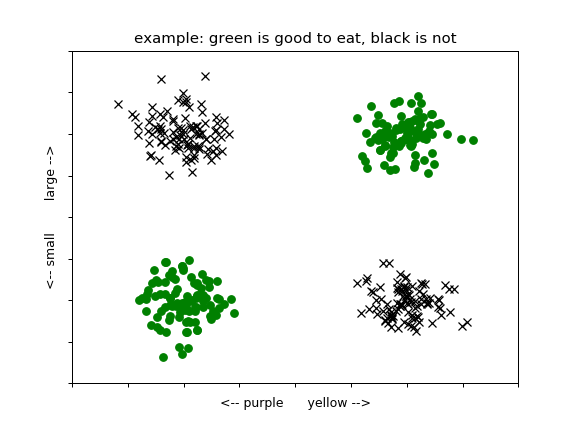

[-2.0, 2.0, -2.0, 2.0]

In [2]:
# Generate example 1 data. 
n_points = 100
scale = .2
loc = 1.
x_large_yellow = np.random.normal(loc=loc, scale=scale, size=n_points) 
y_large_yellow = np.random.normal(loc=loc, scale=scale, size=n_points) 
x_small_yellow = np.random.normal(loc=loc, scale=scale, size=n_points) 
y_small_yellow = np.random.normal(loc=-loc, scale=scale, size=n_points) 
x_large_purple = np.random.normal(loc=-loc, scale=scale, size=n_points) 
y_large_purple = np.random.normal(loc=loc, scale=scale, size=n_points) 
x_small_purple = np.random.normal(loc=-loc, scale=scale, size=n_points) 
y_small_purple = np.random.normal(loc=-loc, scale=scale, size=n_points) 

fig = plt.figure(1)
ax = fig.add_subplot(111)

plt.title("example: green is good to eat, black is not")

plt.plot(x_large_yellow, y_large_yellow, c='green', marker='o', linestyle='None')
plt.plot(x_small_purple, y_small_purple, c='green', marker='o', linestyle='None')
plt.plot(x_large_purple, y_large_purple, c='black', marker='x', linestyle='None')
plt.plot(x_small_yellow, y_small_yellow, c='black', marker='x', linestyle='None')
ax.set_xlabel('<-- purple      yellow -->')
ax.set_ylabel('<-- small        large -->')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis([-2., 2., -2., 2.])

* remember to click on the "stop intereaction" before move to the next plot
    * otherwise next plot will reuse this earlier instance

<IPython.core.display.Javascript object>


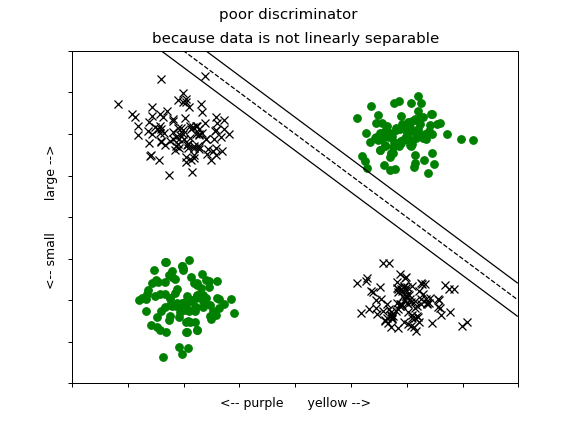

In [3]:
fig = plt.figure(2)
ax = fig.add_subplot(111)
plt.plot(x_large_yellow, y_large_yellow, c='green', marker='o', linestyle='None')
plt.plot(x_small_purple, y_small_purple, c='green', marker='o', linestyle='None')
plt.plot(x_large_purple, y_large_purple, c='black', marker='x', linestyle='None')
plt.plot(x_small_yellow, y_small_yellow, c='black', marker='x', linestyle='None')
ax.set_xlabel('<-- purple      yellow -->')
ax.set_ylabel('<-- small        large -->')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis([-2., 2., -2., 2.])


plt.suptitle("poor discriminator")
plt.title("because data is not linearly separable")


x = np.arange(-2., 2., .01)
margin = .2
plt.plot(
    x, 1 - x,
    color='black',
    linestyle='dashed',
    linewidth=1.,
)
plt.plot(
    x, 1 - x + margin,
    color='black',
    linewidth=1.,
)
plt.plot(
    x, 1 - x - margin,
    color='black',
    linewidth=1.,
)

* remember to click on the "stop intereaction" before move to the next plot
    * otherwise next plot will reuse this earlier instance

<IPython.core.display.Javascript object>


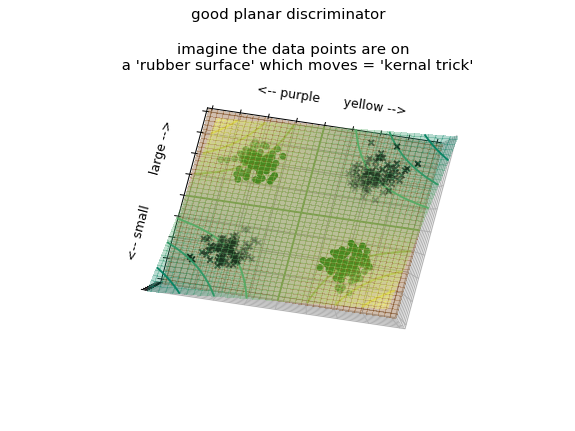

In [4]:
fig = plt.figure(3)
ax = fig.add_subplot(111, projection='3d')

plt.suptitle("hyperbolic surface")
plt.title("imagine the data points are on \n a 'rubber surface' which moves = 'kernal trick'")

x = np.arange(-2, 2, 0.05)
y = np.arange(-2, 2, 0.05)
x, y = np.meshgrid(x, y)
hyp = x * y
zmin = -2.
zmax = 2.
ax.plot_surface(
    x, y, hyp,
    cmap=cm.summer,
    alpha=.3,
    linewidth=0,
    antialiased=False,
)
ax.contour(
    x, y, hyp,
    cmap=cm.summer,
)
ax.set_xlabel('<-- purple      yellow -->')
ax.set_ylabel('<-- small        large -->')
ax.set_zticklabels([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis([-2., 2., -2., 2.])
ax.set_zlim([zmin, zmax])

z_large_yellow = x_large_yellow * y_large_yellow
z_small_yellow = x_small_yellow * y_small_yellow
z_large_purple = x_large_purple * y_large_purple
z_small_purple = x_small_purple * y_small_purple

ax.scatter(x_large_yellow, y_large_yellow, z_large_yellow, c='green', marker='o')
ax.scatter(x_small_purple, y_small_purple, z_small_purple, c='green', marker='o')
ax.scatter(x_large_purple, y_large_purple, z_large_purple, c='black', marker='x')
ax.scatter(x_small_yellow, y_small_yellow, z_small_yellow, c='black', marker='x')

ax.view_init(azim=75, elev=-90)

# click and drag mouse from bottom right to centre, to see the rubber surface form (can move it: strecth, bend, warp)

In [5]:
plt.suptitle("good planar discriminator")

plane = 0. * x
ax.plot_surface(
    x, y, plane,
    alpha=.3,
    linewidth=0,
    antialiased=False,
)

### Transformations: other surfaces

<IPython.core.display.Javascript object>


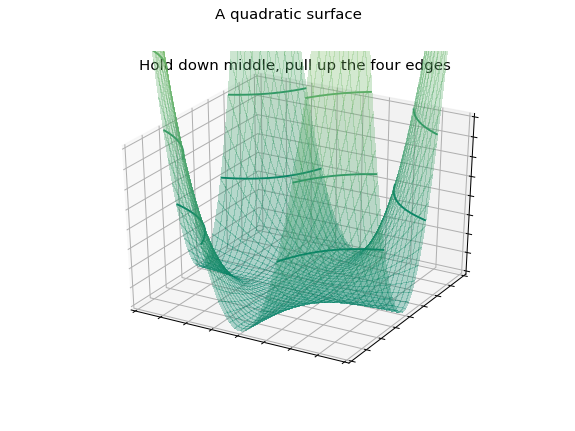

(0, 4.0)

In [6]:
fig = plt.figure(4)
ax = fig.add_subplot(111, projection='3d')

plt.suptitle("A quadratic surface")

plt.title("Hold down middle, pull up the four edges")

quadratic = x**2 * y**2
ax.plot_surface(
    x, y, quadratic,
    cmap=cm.summer,
    alpha=.3,
    linewidth=0,
    antialiased=False,
)
ax.contour(x, y, quadratic, cmap=cm.summer)
ax.set_zticklabels([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis([-2., 2., -2., 2.])
ax.set_zlim([0, 4.])


<IPython.core.display.Javascript object>


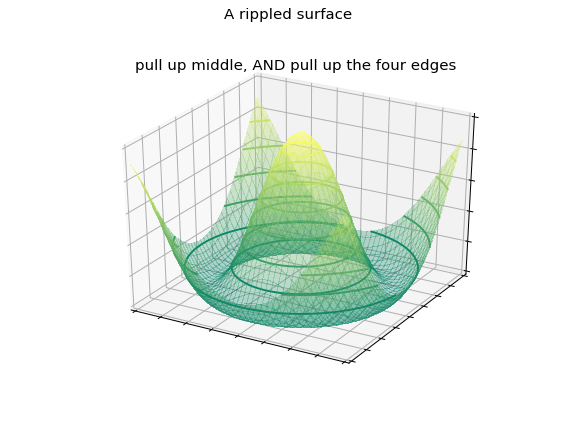

(0.0, 1.0)

In [7]:
fig = plt.figure(5)
ax = fig.add_subplot(111, projection='3d')

plt.suptitle("A rippled surface")

plt.title("pull up middle, AND pull up the four edges")

ripple = np.cos((x**2 + y**2)**.5)**2
ax.plot_surface(
    x, y, ripple,
    cmap=cm.summer,
    alpha=.3,
    linewidth=0,
    antialiased=False,
)
ax.contour(x, y, ripple, cmap=cm.summer)
ax.set_zticklabels([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis([-2., 2., -2., 2.])
ax.set_zlim([0., 1.])

<IPython.core.display.Javascript object>


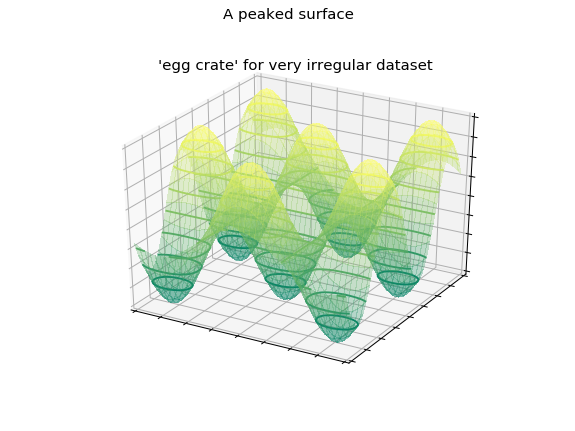

(-1.0, 1.0)

In [8]:
fig = plt.figure(6)
ax = fig.add_subplot(111, projection='3d')

plt.suptitle("A peaked surface")

plt.title("'egg crate' for very irregular dataset")

peaked = np.cos(2 * x) * np.sin(3 * y)
ax.plot_surface(
    x, y, peaked,
    cmap=cm.summer,
    alpha=.3,
    linewidth=0,
    antialiased=False,
)
ax.contour(x, y, peaked, cmap=cm.summer)
ax.set_zticklabels([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis([-2., 2., -2., 2.])
ax.set_zlim([-1., 1.])

* Choice of projection $\phi$ ?

    * VIA: kernel transformation:
        * compute a basis function centered at every point in the dataset, and let the SVM algorithm sift through the results
    * PROBLEM: projecting N points into N dimensions => computationally intensive as N grows large
    * SOLUTION: kernel trick => fit on kernel-transformed data can be done implicitly (do NOT build the full N-dimensional representation of the kernel projection)

ref: youtube.com/watch?v=-Z4aojJ-pdg